In [1]:
## For debbugging
%load_ext autoreload

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
## for debugging:
%aimport mlp.keyword
%aimport mlp.tools
%autoreload 1
from mlp.keyword import *

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
%matplotlib inline

import spacy, textacy, platform
print(
    f'Textacy: \t{textacy.__version__:}'+\
    f'\nspaCy: \t{spacy.__version__:>13}'+\
    f'\nPython: \t{platform.python_version()}'
    )

Textacy: 	0.4.1
spaCy: 	        1.9.0
Python: 	3.6.3


In [4]:
data_directory = os.path.join(module_path,'./data', 'gs_data')

In [5]:
df = pd.read_excel(os.path.join(data_directory, 'GS_token_pairs.xlsx'), index_col=0)

df.describe()

,token,Raw Classification,P|S|I|X,Pairs,new alias,original alias,Original NE
count,2998,2998,2998,673,2998,207,691
unique,2994,11,6,2,2716,174,5
top,False,I,I,SI,person,person,I
freq,2,1069,1069,372,29,6,350


In [6]:
df[df['P|S|I|X']=='O'].head()

,token,Raw Classification,P|S|I|X,Pairs,new alias,original alias,Original NE
Number,,,,,,,
47,accumulator_check,SI,O,SI,check accumulator,NaN,R
71,hydraulic_leak,PI,O,PI,leak hydraulic,NaN,R
129,base_clean,SI,O,SI,clean base,NaN,R
175,chip_conveyor jam,PI,O,PI,jam chip_conveyor,NaN,R
194,coolant leak,PI,O,PI,leak coolant,NaN,NaN


In [7]:
import networkx as nx

G = nx.Graph()
nodes = df[df['P|S|I|X'].isin(['P', 'S', 'I'])]['new alias']

G.add_nodes_from(nodes)

In [8]:
edges=df[df['P|S|I|X']=='O']['new alias'].str.split(' ').values
G.add_edges_from(edges[np.array([len(i) for i in edges])==2])
# df[df['P|S|I|X']=='O'][np.array([len(i) for i in edges])==1]


/home/tbsexton/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/home/tbsexton/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/home/tbsexton/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


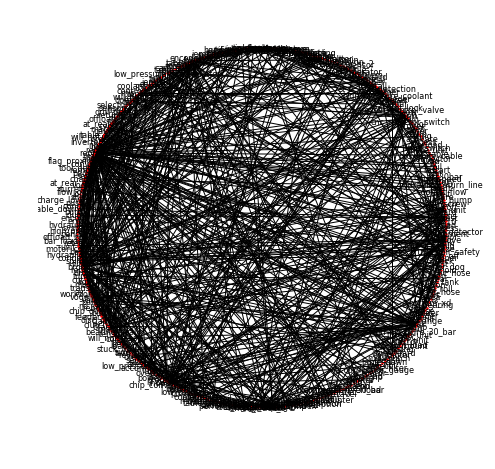

In [9]:
H = max(nx.connected_component_subgraphs(G), key=len)
plt.figure(figsize=(8,8))

nx.draw_networkx(H, pos=nx.layout.circular_layout(H), node_size=2, font_size=8)
limits=plt.axis('off')

In [48]:
from mlp.nx2gt import nx2gt
import graph_tool.all as gta
import graph_tool as gt

g = nx2gt(G)

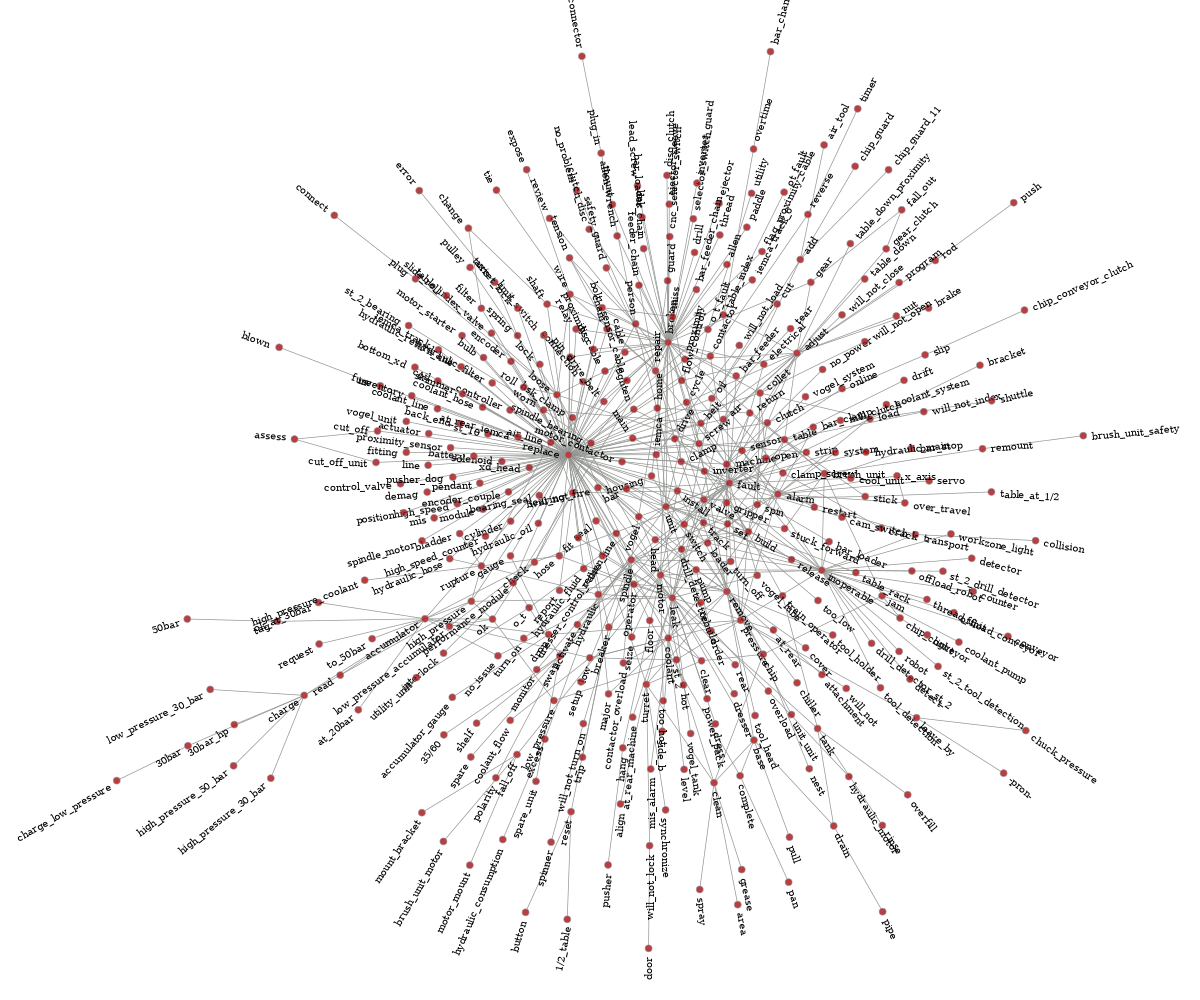

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f91884a4f98, at 0x7f91884a47b8>

In [49]:
# pos = gta.
g = gta.GraphView(g, vfilt=gta.label_largest_component(g))
gta.graph_draw(g, 
#                pos=pos, 
               output_size=(1200,1000), 
               inline=True,
               vertex_text=g.vertex_properties["id"],
               vertex_text_position='centered',
               vertex_font_size=10, 
               vertex_size=7,
               edge_color='xkcd:grey')


In [26]:
# g.save('pairs.gt')

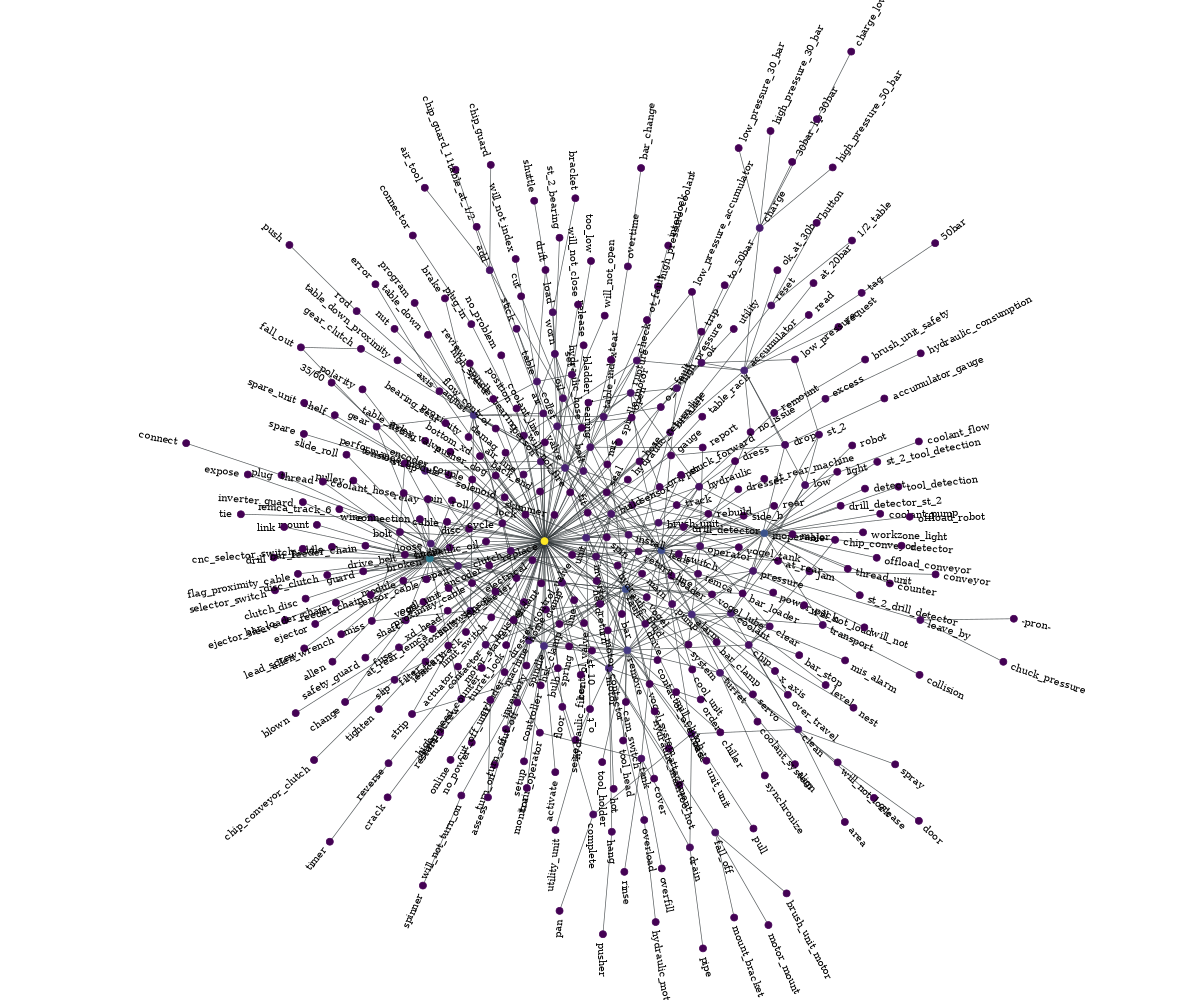

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f91884a4f98, at 0x7f91b1cfadd8>

In [53]:
import matplotlib
s = gta.vertex_similarity(g, "inv-log-weight")
# color = g.new_vp("double")
# color.a = s[0].a
pr = gta.pagerank(g)
gta.graph_draw(g, vertex_text=g.vertex_properties["id"],output_size=(1200,1000),
              vertex_color=pr, vertex_fill_color=pr,vertex_font_size=10, 
               vertex_size=7,vertex_text_position='centered',
              vcmap=matplotlib.cm.viridis)